In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DROPPED_PLAYERS, select_scl5
from triple_agent.reports.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_role)
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.utilities.roles import Roles
from triple_agent.utilities.outcomes import WinType

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

In [5]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

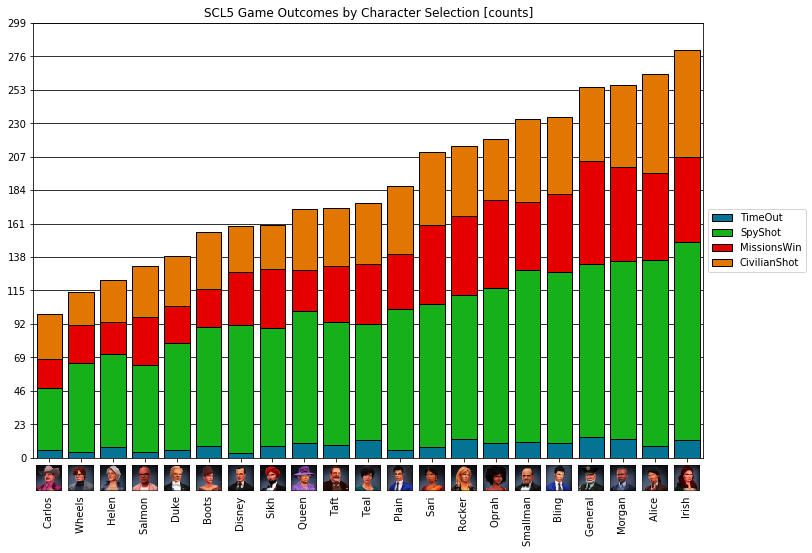

In [6]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sum,
    portrait_x_axis=True,
    reversed_data_sort=True,
    percentile_plot=False,
    savefig='scl5_spy_selection.png'
)

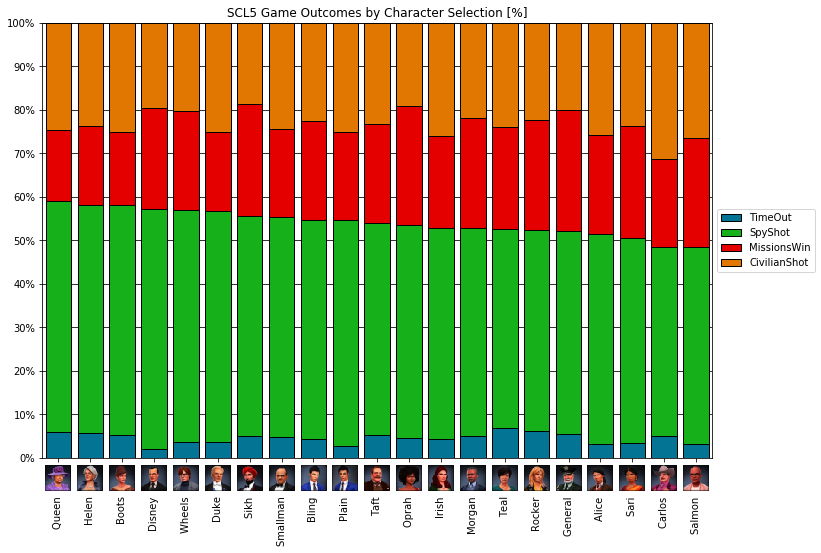

In [7]:
game_outcomes(
    scl5_replays,
    "SCL5 Game Outcomes by Character Selection",
    groupby=lambda g: determine_role(g, Roles.Spy),
    category_data_order=sort_by_spy_wins,
    portrait_x_axis=True,
    counts_plot=False
)

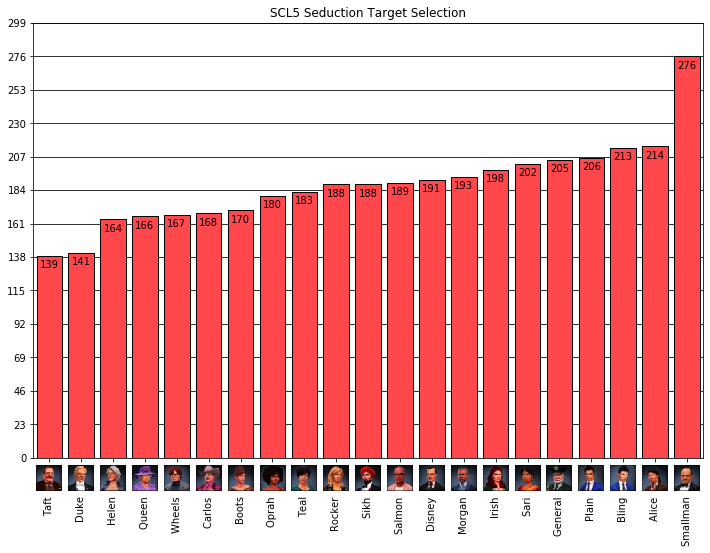

In [8]:
st_selection(scl5_replays, "SCL5 Seduction Target Selection", percentile_plot=False, category_data_order=sum)

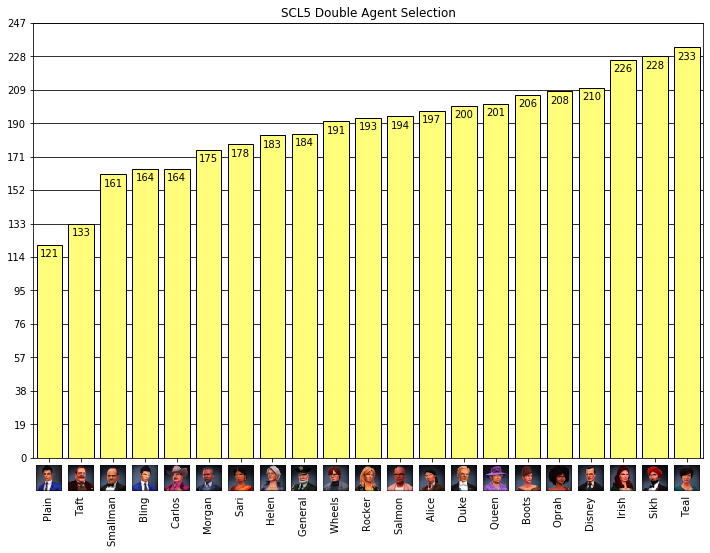

In [9]:
double_agent_selection(scl5_replays, "SCL5 Double Agent Selection", percentile_plot=False, category_data_order=sum)

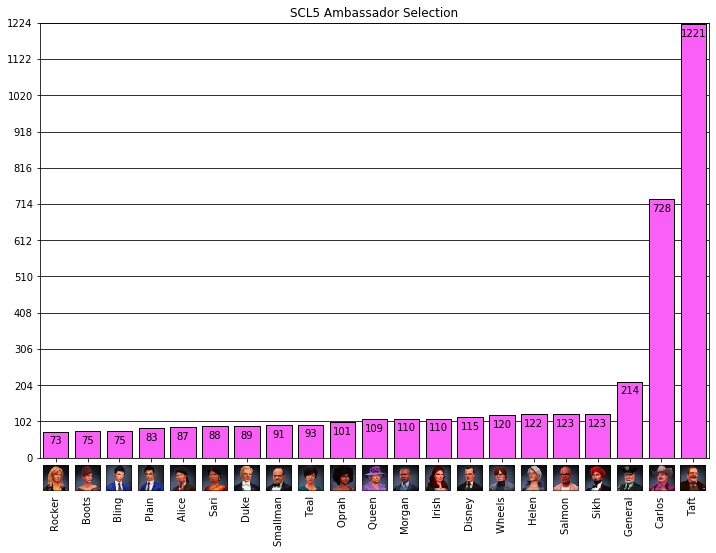

In [10]:
amba_selection(scl5_replays, "SCL5 Ambassador Selection", percentile_plot=False, category_data_order=sum)